Data Background

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

1. It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. 

2. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

3. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

Important Note/Recommendation by author

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

Acknowledgements

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

Please cite the following works:

    Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

    Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

    Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE
        Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

    Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

    Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

In [1]:
import pyspark
from pyspark import SparkContext, SparkConf
# Spark Config
conf = SparkConf().setAppName("1_app")
sc = SparkContext(conf=conf)
import pandas
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas as pd
#pd.options.display.mpl_style = 'default'

In [2]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
data = sqlContext.read.load('creditcard.csv', 
                          format='com.databricks.spark.csv', 
                          header='true', 
                          inferSchema='true')

In [3]:
print(data.count())
data.printSchema()
data.dtypes

284807
root
 |-- Time: decimal(6,0) (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: double (nullable = true)
 |-- V28: 

[('Time', 'decimal(6,0)'),
 ('V1', 'double'),
 ('V2', 'double'),
 ('V3', 'double'),
 ('V4', 'double'),
 ('V5', 'double'),
 ('V6', 'double'),
 ('V7', 'double'),
 ('V8', 'double'),
 ('V9', 'double'),
 ('V10', 'double'),
 ('V11', 'double'),
 ('V12', 'double'),
 ('V13', 'double'),
 ('V14', 'double'),
 ('V15', 'double'),
 ('V16', 'double'),
 ('V17', 'double'),
 ('V18', 'double'),
 ('V19', 'double'),
 ('V20', 'double'),
 ('V21', 'double'),
 ('V22', 'double'),
 ('V23', 'double'),
 ('V24', 'double'),
 ('V25', 'double'),
 ('V26', 'double'),
 ('V27', 'double'),
 ('V28', 'double'),
 ('Amount', 'double'),
 ('Class', 'double')]

In [5]:
#data.show(5) 
pd.DataFrame(data.take(5), columns=data.columns)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
data.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Time,284807,94813.8596,47488.14595456682,0,172792
V1,284807,1.7587016811522367E-12,1.9586958038519724,-56.40750963,2.454929991
V2,284807,-8.252295770297642E-13,1.651308579483266,-72.71572756,22.05772899
V3,284807,-9.637437744595759E-13,1.5162550051772035,-48.32558936,9.382558433
V4,284807,8.316234490267921E-13,1.4158685749420252,-5.683171198,16.87534403
V5,284807,1.5920131886285926E-13,1.3802467340261997,-113.7433067,34.80166588
V6,284807,4.2473084255041437E-13,1.3322710897581855,-26.16050594,73.30162555
V7,284807,-3.0501829155291653E-13,1.2370935981664275,-43.55724157,120.5894939
V8,284807,8.692882072859067E-14,1.1943529026722184,-73.21671846,20.00720837


In [3]:
data = data.na.drop()
data.count()

284807

In [7]:
data = data.withColumnRenamed('Class', 'label')
data

DataFrame[Time: decimal(6,0), V1: double, V2: double, V3: double, V4: double, V5: double, V6: double, V7: double, V8: double, V9: double, V10: double, V11: double, V12: double, V13: double, V14: double, V15: double, V16: double, V17: double, V18: double, V19: double, V20: double, V21: double, V22: double, V23: double, V24: double, V25: double, V26: double, V27: double, V28: double, Amount: double, label: double]

In [8]:
data.groupby('label').count().toPandas()
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline
# df_pd = data.toPandas()
# print(len(df_pd))
# plt.figure(figsize=(12,10))
# sns.countplot(x='Class', data=df_pd, order=df_pd['Class'].value_counts().index)

,label,count
0,0.0,284315
1,1.0,492


In [9]:
fraudDf = data.filter("label=1.0")
pd.DataFrame(fraudDf.take(5), columns=data.columns)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,label
0,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
1,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
2,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
3,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
4,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0


Understanding correlation between time and Amount, time and class, amount and class

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,label
V1,1.000000e+00,3.777390e-12,-2.119590e-12,-1.723987e-13,-3.472872e-12,-1.306503e-13,-1.127606e-13,2.115119e-12,3.082931e-14,-2.615217e-12,...,-3.276405e-12,2.281838e-12,-2.971545e-12,-1.029981e-12,1.146708e-12,1.835355e-12,7.624890e-12,-9.775021e-13,-0.227709,-0.101347
V2,3.777390e-12,1.000000e+00,2.326793e-12,-2.314714e-12,-1.832647e-12,9.439520e-13,5.403066e-12,2.154315e-14,3.239478e-13,1.463138e-12,...,2.280608e-12,-2.545801e-13,-4.855972e-12,6.430856e-13,-9.428020e-13,-4.128702e-13,-9.857628e-13,2.525337e-12,-0.531409,0.091289
V3,-2.119590e-12,2.326793e-12,1.000000e+00,2.036773e-13,-4.031500e-12,-1.582866e-13,3.404535e-12,-1.271762e-12,-6.819756e-13,-1.611248e-12,...,6.735881e-13,-8.922002e-13,4.146843e-12,3.408178e-12,5.718402e-13,-2.576534e-12,-5.041928e-12,5.188986e-12,-0.210880,-0.192961
V4,-1.723987e-13,-2.314714e-12,2.036773e-13,1.000000e+00,-2.549940e-13,1.083591e-12,8.130005e-13,7.338258e-13,-7.138418e-13,-1.938815e-12,...,-2.696255e-12,4.343856e-13,-4.161182e-12,-2.368672e-12,1.619548e-12,-3.045583e-13,-1.455906e-12,-2.832335e-12,0.098732,0.133447
V5,-3.472872e-12,-1.832647e-12,-4.031500e-12,-2.549940e-13,1.000000e+00,-6.987953e-14,1.573952e-11,-2.038440e-12,-1.000442e-12,-7.186398e-13,...,-1.752007e-12,7.097660e-13,3.616454e-12,-2.808677e-13,1.452166e-12,-1.895823e-13,-2.124508e-12,1.010196e-11,-0.386356,-0.094974
V6,-1.306503e-13,9.439520e-13,-1.582866e-13,1.083591e-12,-6.987953e-14,1.000000e+00,-2.798868e-12,-5.446280e-13,2.036987e-12,7.430432e-13,...,1.476725e-12,-1.145022e-12,-1.527594e-12,1.552019e-12,-2.723518e-12,3.351154e-12,1.480837e-12,-6.072098e-13,0.215981,-0.043643
V7,-1.127606e-13,5.403066e-12,3.404535e-12,8.130005e-13,1.573952e-11,-2.798868e-12,1.000000e+00,5.528638e-12,5.086075e-13,1.676664e-12,...,2.787545e-12,-8.133857e-13,-4.292205e-12,-2.553517e-12,-7.410247e-13,-4.475979e-12,-1.328690e-11,2.955502e-13,0.397311,-0.187257
V8,2.115119e-12,2.154315e-14,-1.271762e-12,7.338258e-13,-2.038440e-12,-5.446280e-13,5.528638e-12,1.000000e+00,-2.243354e-12,-1.660414e-12,...,-4.022308e-12,-2.679623e-12,9.013169e-13,-1.074228e-12,-3.268917e-12,1.043932e-12,-3.500243e-12,1.866545e-12,-0.103079,0.019875
V9,3.082931e-14,3.239478e-13,-6.819756e-13,-7.138418e-13,-1.000442e-12,2.036987e-12,5.086075e-13,-2.243354e-12,1.000000e+00,1.185026e-12,...,3.040343e-12,-7.470394e-13,-1.011174e-12,8.577445e-13,-1.589047e-12,-7.738602e-13,2.429474e-12,-1.406038e-12,-0.044246,-0.097733
V10,-2.615217e-12,1.463138e-12,-1.611248e-12,-1.938815e-12,-7.186398e-13,7.430432e-13,1.676664e-12,-1.660414e-12,1.185026e-12,1.000000e+00,...,-5.544676e-13,-1.311098e-13,1.173406e-12,6.406207e-13,2.795500e-12,-2.739978e-13,1.552762e-12,5.116567e-12,-0.101502,-0.216883


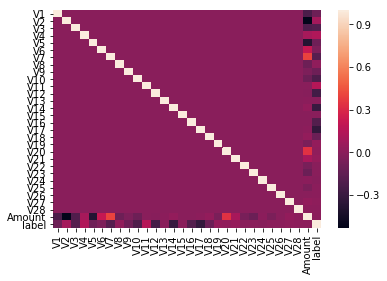

In [10]:
numeric_features = [t[0] for t in data.dtypes if t[1] == 'int' or t[1] == 'double']

import seaborn as sns
sampled_data = data.select(numeric_features).toPandas()
corr = sampled_data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
corr

In [9]:
from pyspark.ml.feature import VectorAssembler

vectorAssembler = VectorAssembler(inputCols = ['V1', 'V2','V3', 'V4','V5',
                                               'V6', 'V7','V8', 'V9','V10',
                                               'V11', 'V12','V13', 'V14','V15',
                                               'V16', 'V17','V18', 'V19','V20',
                                               'V21', 'V22','V23', 'V24','V25',
                                               'V26', 'V27','V28', 'Amount'], outputCol = 'features')
vdata = vectorAssembler.transform(data)
vdata = vdata.select(['features', 'label'])
vdata.show(3)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[-1.359807134,-0....|  0.0|
|[1.191857111,0.26...|  0.0|
|[-1.358354062,-1....|  0.0|
+--------------------+-----+
only showing top 3 rows



In [10]:
### Randomly split data into training and test sets. set seed for reproducibility
(trainingData, testData) = vdata.randomSplit([0.7, 0.3], seed = 100)
print(trainingData.count())
print(testData.count())

199271
85536


In [15]:
from pyspark.ml.classification import LogisticRegression


In [14]:
# Create initial LogisticRegression model
lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=10)

# Train model with Training Data
lrModel = lr.fit(trainingData)

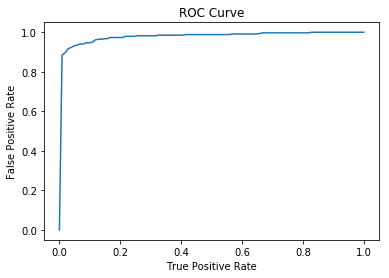

Training set ROC: 0.9783110671272542


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
trainingSummary = lrModel.summary

roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print('Training set ROC: ' + str(trainingSummary.areaUnderROC))

In [16]:
# Make predictions on test data using the transform() method.
# LogisticRegression.transform() will only use the 'features' column.
predictions = lrModel.transform(testData)
predictions.printSchema()

root
 |-- features: vector (nullable = true)
 |-- label: double (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [17]:
# View model's predictions and probabilities of each prediction class
# You can select any columns in the above schema to view as well. For example's sake we will choose age & occupation
selected = predictions.select("rawPrediction", "prediction", "probability", "label", "features")
selected.toPandas()

,rawPrediction,prediction,probability,label,features
0,"[6.28274725771387, -6.28274725771387]",0.0,"[0.9981352229469417, 0.0018647770530583435]",0.0,"[-40.0425375, -38.4308424, -21.27717608, 10.52..."
1,"[0.49146754564503503, -0.49146754564503503]",0.0,"[0.6204520876059884, 0.3795479123940116]",0.0,"[-36.80231991, -63.34469832, -20.6457939, 16.7..."
2,"[6.019888418556004, -6.019888418556004]",0.0,"[0.997575949582615, 0.0024240504173849006]",0.0,"[-36.51058317, -40.93804844, -5.377986495, 11...."
3,"[6.959080587984752, -6.959080587984752]",0.0,"[0.999050931999134, 0.0009490680008660878]",0.0,"[-35.90510491, -31.04136237, -19.47290828, 9.2..."
4,"[6.991587693068366, -6.991587693068366]",0.0,"[0.9990812595075657, 0.0009187404924343727]",0.0,"[-34.59121347, -44.63924472, 0.305847274, 10.8..."
5,"[7.829113097230498, -7.829113097230498]",0.0,"[0.9996021800318505, 0.0003978199681494802]",0.0,"[-34.09203153, -24.23741824, -15.75801209, 12...."
6,"[4.03246164164353, -4.03246164164353]",0.0,"[0.9825782685377784, 0.01742173146222157]",0.0,"[-33.66991688, -47.42967628, -7.198018216, 10...."
7,"[9.161175383076694, -9.161175383076694]",0.0,"[0.9998949716681358, 0.00010502833186431223]",0.0,"[-33.01717443, -39.81831012, -1.445970613, 10...."
8,"[2.2674140260683773, -2.2674140260683773]",0.0,"[0.9061420851526192, 0.09385791484738079]",0.0,"[-32.27346975, 17.93055045, -32.45419819, 6.55..."
9,"[2.3278564816592713, -2.3278564816592713]",0.0,"[0.911157973675944, 0.08884202632405595]",0.0,"[-32.05811916, -48.06085602, -6.939375917, 10...."


In [18]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Evaluate model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
evaluator.evaluate(predictions)

0.9745019194791706

In [19]:
from pyspark.mllib.evaluation import MulticlassMetrics
predictionAndLabel = predictions.select("prediction", "label").rdd

# # Generate confusion matrix
metrics = MulticlassMetrics(predictionAndLabel)
precision = metrics.precision()
precision1 = metrics.precision(1)
recall = metrics.recall()
recall1 = metrics.recall(1)
f1Score = metrics.fMeasure()
print("Summary Stats")
print("Precision = %s" % precision)
print("Recall = %s" % recall)
print("F1 Score = %s" % f1Score)
print("Precision1 = %s" % precision1)
print("Recall1 = %s" % recall1)
print(metrics.confusionMatrix()) # Change Class to Double

Summary Stats
Precision = 0.9990647212869435
Recall = 0.9990647212869435
F1 Score = 0.9990647212869435
Precision1 = 0.8440366972477065
Recall1 = 0.5935483870967742
DenseMatrix([[8.5364e+04, 1.7000e+01],
             [6.3000e+01, 9.2000e+01]])


In [20]:
#what is the name of the evaluator?
evaluator.getMetricName()

'areaUnderROC'

In [22]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
              .addGrid(lr.regParam, [0.01, 0.5, 2.0])
              .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
              .addGrid(lr.maxIter, [1, 5, 10])
              .build())

# Create 5-fold CrossValidator
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

# Run cross validations
cvModel = cv.fit(trainingData)
# this will likely take a fair amount of time because of the amount of models that we're creating and testing

In [23]:
# Use test set here so we can measure the accuracy of our model on new data

predictions1 = cvModel.transform(testData)
# cvModel uses the best model found from the Cross Validation
# Evaluate best model
evaluator.evaluate(predictions1)

0.9781153244407457

In [24]:
print('Model Intercept: ', cvModel.bestModel.intercept)

Model Intercept:  -7.154420879317032


In [25]:
from pyspark.mllib.evaluation import MulticlassMetrics
predictionAndLabel1 = predictions1.select("prediction", "label").rdd

# # Generate confusion matrix
metrics = MulticlassMetrics(predictionAndLabel1)
precision = metrics.precision()
precision1 = metrics.precision(1)
recall = metrics.recall()
recall1 = metrics.recall(1)
f1Score = metrics.fMeasure()
print("Summary Stats")
print("Precision = %s" % precision)
print("Recall = %s" % recall)
print("F1 Score = %s" % f1Score)
print("Precision1 = %s" % precision1)
print("Recall1 = %s" % recall1)
print(metrics.confusionMatrix()) # Change Class to Double

Summary Stats
Precision = 0.9987724466891134
Recall = 0.9987724466891134
F1 Score = 0.9987724466891134
Precision1 = 0.8048780487804879
Recall1 = 0.4258064516129032
DenseMatrix([[8.5365e+04, 1.6000e+01],
             [8.9000e+01, 6.6000e+01]])


In [26]:
#weights = cvModel.bestModel.weights
# on Spark 2.X weights are available as ceofficients
weights = cvModel.bestModel.coefficients
weights = map(lambda w: (float(w),), weights)  # convert numpy type to float, and to tuple
weightsDF = sqlContext.createDataFrame(weights, ["Feature Weight"])
weightsDF.toPandas()

,Feature Weight
0,-0.008936
1,0.016873
2,-0.056792
3,0.100772
4,0.026757
5,-0.026701
6,-0.035663
7,-0.049983
8,-0.061353
9,-0.123493


In [27]:
# View best model's predictions and probabilities of each prediction class
selected = predictions.select("label", "prediction", "probability", "features", "rawPrediction")
#selected.toPandas()

Using Stratified Dataset

In [11]:
data = data.sampleBy('label', fractions={0: 482./284807, 1: 1.0}).cache()
data.groupby('label').count().toPandas()

,label,count
0,0.0,479
1,1.0,492


In [12]:
vectorAssembler1 = VectorAssembler(inputCols = ['V1', 'V2','V3', 'V4','V5',
                                               'V6', 'V7','V8', 'V9','V10',
                                               'V11', 'V12','V13', 'V14','V15',
                                               'V16', 'V17','V18', 'V19','V20',
                                               'V21', 'V22','V23', 'V24','V25',
                                               'V26', 'V27','V28', 'Amount'], outputCol = 'features')
vdata1 = vectorAssembler1.transform(data)
vdata1 = vdata1.select(['features', 'label'])
vdata1.show(3)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[1.098608346,0.20...|  0.0|
|[1.175124777,0.66...|  0.0|
|[-2.419485626,1.9...|  0.0|
+--------------------+-----+
only showing top 3 rows



In [13]:
### Randomly split data into training and test sets. set seed for reproducibility
(trainingData1, testData1) = vdata1.randomSplit([0.7, 0.3], seed = 100)
print(trainingData1.count())
print(testData1.count())

663
308


In [17]:
# Create initial LogisticRegression model
lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=10)

# Train model with Training Data
lrModel = lr.fit(trainingData1)

In [18]:
# Make predictions on test data using the transform() method.
# LogisticRegression.transform() will only use the 'features' column.
predictions = lrModel.transform(testData1)
predictions.printSchema()

root
 |-- features: vector (nullable = true)
 |-- label: double (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [19]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Evaluate model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
evaluator.evaluate(predictions)

0.9769110632729726

In [21]:
from pyspark.mllib.evaluation import MulticlassMetrics
predictionAndLabel1 = predictions.select("prediction", "label").rdd

# # Generate confusion matrix
metrics = MulticlassMetrics(predictionAndLabel1)
precision = metrics.precision()
precision1 = metrics.precision(1)
recall = metrics.recall()
recall1 = metrics.recall(1)
f1Score = metrics.fMeasure()
print("Summary Stats")
print("Precision Label 0 = = %s" % precision)
print("Recall Label 0 = %s" % recall)
print("F1 Score = %s" % f1Score)
print("Precision Label 1 = %s" % precision1)
print("Recall Label 1 = %s" % recall1)
print(metrics.confusionMatrix()) # Change Class to Double

Summary Stats
Precision Label 0 = = 0.9415584415584416
Recall Label 0 = 0.9415584415584416
F1 Score = 0.9415584415584416
Precision Label 1 = 0.9517241379310345
Recall Label 1 = 0.9261744966442953
DenseMatrix([[152.,   7.],
             [ 11., 138.]])


In [22]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
              .addGrid(lr.regParam, [0.01, 0.5, 2.0])
              .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
              .addGrid(lr.maxIter, [1, 5, 10])
              .build())

# Create 5-fold CrossValidator
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

# Run cross validations
cvModel = cv.fit(trainingData1)
# this will likely take a fair amount of time because of the amount of models that we're creating and testing

In [23]:
# Use test set here so we can measure the accuracy of our model on new data

predictions2 = cvModel.transform(testData1)
# cvModel uses the best model found from the Cross Validation
# Evaluate best model
evaluator.evaluate(predictions2)

0.9782617871765655

In [24]:
print('Model Intercept: ', cvModel.bestModel.intercept)

Model Intercept:  -2.258869160843057


In [25]:
from pyspark.mllib.evaluation import MulticlassMetrics
predictionAndLabel2 = predictions2.select("prediction", "label").rdd

# # Generate confusion matrix
metrics = MulticlassMetrics(predictionAndLabel2)
precision = metrics.precision()
precision1 = metrics.precision(1)
recall = metrics.recall()
recall1 = metrics.recall(1)
f1Score = metrics.fMeasure()
print("Summary Stats")
print("Precision Label 0 = = %s" % precision)
print("Recall Label 0 = %s" % recall)
print("F1 Score = %s" % f1Score)
print("Precision Label 1 = %s" % precision1)
print("Recall Label 1 = %s" % recall1)
print(metrics.confusionMatrix()) # Change Class to Double

Summary Stats
Precision Label 0 = = 0.9415584415584416
Recall Label 0 = 0.9415584415584416
F1 Score = 0.9415584415584416
Precision Label 1 = 0.9851851851851852
Recall Label 1 = 0.8926174496644296
DenseMatrix([[157.,   2.],
             [ 16., 133.]])


Decision Tree

In [27]:
from pyspark.ml.classification import DecisionTreeClassifier

# Create initial Decision Tree Model
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features", maxDepth=3)

# Train model with Training Data
dtModel = dt.fit(trainingData1)

In [28]:
# Make predictions on test data using the Transformer.transform() method.
predictions3 = dtModel.transform(testData1)

In [29]:
dt.getImpurity()

'gini'

In [30]:
from pyspark.mllib.evaluation import MulticlassMetrics
predictionAndLabel3 = predictions3.select("prediction", "label").rdd

# # Generate confusion matrix
metrics = MulticlassMetrics(predictionAndLabel3)
precision = metrics.precision()
precision1 = metrics.precision(1)
recall = metrics.recall()
recall1 = metrics.recall(1)
f1Score = metrics.fMeasure()
print("Summary Stats")
print("Precision Label 0 = = %s" % precision)
print("Recall Label 0 = %s" % recall)
print("F1 Score = %s" % f1Score)
print("Precision Label 1 = %s" % precision1)
print("Recall Label 1 = %s" % recall1)
print(metrics.confusionMatrix()) # Change Class to Double

Summary Stats
Precision Label 0 = = 0.9415584415584416
Recall Label 0 = 0.9415584415584416
F1 Score = 0.9415584415584416
Precision Label 1 = 0.9781021897810219
Recall Label 1 = 0.8993288590604027
DenseMatrix([[156.,   3.],
             [ 15., 134.]])


In [31]:
# Create ParamGrid for Cross Validation
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

paramGrid = (ParamGridBuilder()
             .addGrid(dt.maxDepth, [1,2,6,10])
             .addGrid(dt.maxBins, [20,40,80])
             .build())

In [32]:
# Create 5-fold CrossValidator
cv = CrossValidator(estimator=dt, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

# Run cross validations
cvModel = cv.fit(trainingData1)
# Takes ~5 minutes

In [33]:
print("numNodes = ", cvModel.bestModel.numNodes)
print("depth = ", cvModel.bestModel.depth)

numNodes =  73
depth =  10


In [34]:
# Use test set here so we can measure the accuracy of our model on new data
predictions4 = cvModel.transform(testData1)

In [35]:
from pyspark.mllib.evaluation import MulticlassMetrics
predictionAndLabel4 = predictions4.select("prediction", "label").rdd

# # Generate confusion matrix
metrics = MulticlassMetrics(predictionAndLabel4)
precision = metrics.precision()
precision1 = metrics.precision(1)
recall = metrics.recall()
recall1 = metrics.recall(1)
f1Score = metrics.fMeasure()
print("Summary Stats")
print("Precision Label 0 = = %s" % precision)
print("Recall Label 0 = %s" % recall)
print("F1 Score = %s" % f1Score)
print("Precision Label 1 = %s" % precision1)
print("Recall Label 1 = %s" % recall1)
print(metrics.confusionMatrix()) # Change Class to Double

Summary Stats
Precision Label 0 = = 0.8928571428571429
Recall Label 0 = 0.8928571428571429
F1 Score = 0.8928571428571429
Precision Label 1 = 0.8717948717948718
Recall Label 1 = 0.912751677852349
DenseMatrix([[139.,  20.],
             [ 13., 136.]])


Random Forest

In [36]:
from pyspark.ml.classification import RandomForestClassifier

# Create an initial RandomForest model.
rf = RandomForestClassifier(labelCol="label", featuresCol="features")

# Train model with Training Data
rfModel = rf.fit(trainingData1)

In [38]:
# Make predictions on test data using the Transformer.transform() method.
predictions5 = rfModel.transform(testData1)

In [39]:
from pyspark.mllib.evaluation import MulticlassMetrics
predictionAndLabel5 = predictions5.select("prediction", "label").rdd

# # Generate confusion matrix
metrics = MulticlassMetrics(predictionAndLabel5)
precision = metrics.precision()
precision1 = metrics.precision(1)
recall = metrics.recall()
recall1 = metrics.recall(1)
f1Score = metrics.fMeasure()
print("Summary Stats")
print("Precision Label 0 = = %s" % precision)
print("Recall Label 0 = %s" % recall)
print("F1 Score = %s" % f1Score)
print("Precision Label 1 = %s" % precision1)
print("Recall Label 1 = %s" % recall1)
print(metrics.confusionMatrix()) # Change Class to Double

Summary Stats
Precision Label 0 = = 0.9383116883116883
Recall Label 0 = 0.9383116883116883
F1 Score = 0.9383116883116883
Precision Label 1 = 0.9850746268656716
Recall Label 1 = 0.8859060402684564
DenseMatrix([[157.,   2.],
             [ 17., 132.]])


In [40]:
# Create ParamGrid for Cross Validation
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

paramGrid = (ParamGridBuilder()
             .addGrid(rf.maxDepth, [2, 4, 6])
             .addGrid(rf.maxBins, [20, 60])
             .addGrid(rf.numTrees, [5, 20])
             .build())

In [41]:
# Create 5-fold CrossValidator
cv = CrossValidator(estimator=rf, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

# Run cross validations.  This can take about 6 minutes since it is training over 20 trees!
cvModel = cv.fit(trainingData1)

In [44]:
predictions6 = cvModel.transform(testData1)

In [45]:
from pyspark.mllib.evaluation import MulticlassMetrics
predictionAndLabel6 = predictions6.select("prediction", "label").rdd

# # Generate confusion matrix
metrics = MulticlassMetrics(predictionAndLabel6)
precision = metrics.precision()
precision1 = metrics.precision(1)
recall = metrics.recall()
recall1 = metrics.recall(1)
f1Score = metrics.fMeasure()
print("Summary Stats")
print("Precision Label 0 = = %s" % precision)
print("Recall Label 0 = %s" % recall)
print("F1 Score = %s" % f1Score)
print("Precision Label 1 = %s" % precision1)
print("Recall Label 1 = %s" % recall1)
print(metrics.confusionMatrix()) # Change Class to Double

Summary Stats
Precision Label 0 = = 0.948051948051948
Recall Label 0 = 0.948051948051948
F1 Score = 0.948051948051948
Precision Label 1 = 0.9784172661870504
Recall Label 1 = 0.912751677852349
DenseMatrix([[156.,   3.],
             [ 13., 136.]])


Multilayer Perceptron

In [50]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
layers = [29, 30, 29, 28]
mp = MultilayerPerceptronClassifier(labelCol="label", featuresCol="features", maxIter=100, layers=layers, blockSize=128, seed=1234)

# Train model with Training Data
mpModel = mp.fit(trainingData1)

In [51]:
predictions7 = rfModel.transform(testData1)

In [52]:
from pyspark.mllib.evaluation import MulticlassMetrics
predictionAndLabel7 = predictions7.select("prediction", "label").rdd

# # Generate confusion matrix
metrics = MulticlassMetrics(predictionAndLabel7)
precision = metrics.precision()
precision1 = metrics.precision(1)
recall = metrics.recall()
recall1 = metrics.recall(1)
f1Score = metrics.fMeasure()
print("Summary Stats")
print("Precision Label 0 = = %s" % precision)
print("Recall Label 0 = %s" % recall)
print("F1 Score = %s" % f1Score)
print("Precision Label 1 = %s" % precision1)
print("Recall Label 1 = %s" % recall1)
print(metrics.confusionMatrix()) # Change Class to Double

Summary Stats
Precision Label 0 = = 0.9383116883116883
Recall Label 0 = 0.9383116883116883
F1 Score = 0.9383116883116883
Precision Label 1 = 0.9850746268656716
Recall Label 1 = 0.8859060402684564
DenseMatrix([[157.,   2.],
             [ 17., 132.]])


In [55]:
paramGrid = (ParamGridBuilder()
             .addGrid(mp.seed, [895, 12345])
             .build())

In [56]:
cv = CrossValidator(estimator=mp, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

# Run cross validations.  This can take about 6 minutes since it is training over 20 trees!
cvModel = cv.fit(trainingData1)

In [58]:
predictions8 = cvModel.transform(testData1)

In [63]:
from pyspark.mllib.evaluation import MulticlassMetrics
predictionAndLabel8 = predictions8.select("prediction", "label").rdd

# # Generate confusion matrix
metrics = MulticlassMetrics(predictionAndLabel8)
precision = metrics.precision()
precision1 = metrics.precision(1)
recall = metrics.recall()
recall1 = metrics.recall(1)
f1Score = metrics.fMeasure()
print("Summary Stats")
print("Precision Label 0 = = %s" % precision)
print("Recall Label 0 = %s" % recall)
print("F1 Score = %s" % f1Score)
print("Precision Label 1 = %s" % precision1)
print("Recall Label 1 = %s" % recall1)
print(metrics.confusionMatrix()) # Change Class to Double

Summary Stats
Precision Label 0 = = 0.9253246753246753
Recall Label 0 = 0.9253246753246753
F1 Score = 0.9253246753246753
Precision Label 1 = 0.9144736842105263
Recall Label 1 = 0.9328859060402684
DenseMatrix([[146.,  13.],
             [ 10., 139.]])
